# **Environment Setup & Imports**

### Library Imports

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

c:\Users\VINSMOKE\Desktop\Adult Income Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Dataset Acquisition & Loading**

### Download Dataset from Kaggle

In [2]:
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\VINSMOKE\.cache\kagglehub\datasets\wenruliu\adult-income-dataset\versions\2


### Load Dataset

In [3]:
df = pd.read_csv(f"{path}/adult.csv")

# **Data Inspection**

In [4]:
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [5]:
result = df.head(10)
print(result)

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [6]:
result = df.tail(10)
print(result)

       age     workclass  fnlwgt     education  educational-num  \
48832   32       Private   34066          10th                6   
48833   43       Private   84661     Assoc-voc               11   
48834   32       Private  116138       Masters               14   
48835   53       Private  321865       Masters               14   
48836   22       Private  310152  Some-college               10   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship  \
48832  Married-civ-spouse  Handlers-cleaners        Husband   
48833  Married-civ-spouse              Sales        Husband   
48834       Never-married       Tech-support  Not-in-family   
48835  Mar

In [7]:
print(df.shape)

(48842, 15)


In [8]:
result = df.info()
print(result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


# **Exploratory Data Analysis**

### Random samples form the dataset (50%)

In [9]:
result = df.sample(frac=0.50)
print(result)

       age  workclass  fnlwgt     education  educational-num  \
9131    54    Private  230919       HS-grad                9   
28025   34  Local-gov   97723   Prof-school               15   
14455   33    Private  169104       HS-grad                9   
15158   23    Private   89089     Bachelors               13   
37599   19    Private  138153  Some-college               10   
...    ...        ...     ...           ...              ...   
28350   20    Private  291979       HS-grad                9   
23227   26    Private   53833  Some-college               10   
10506   28    Private  303601          12th                8   
25872   30    Private  190823  Some-college               10   
10665   29    Private  125131       HS-grad                9   

           marital-status         occupation    relationship  \
9131   Married-civ-spouse   Transport-moving         Husband   
28025  Married-civ-spouse     Prof-specialty         Husband   
14455  Married-civ-spouse      Other-se

### Missing Value Analysis



In [10]:
result = df.isna().sum()
print(result)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [11]:
result = df.isin(["?"]).sum(axis=0)
print(result)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


### Frequency Distribution Analysis of Features

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

- What is the distribution of numerical features `age` and `hours-per-week`?
- Are these features normally distributed or skewed?

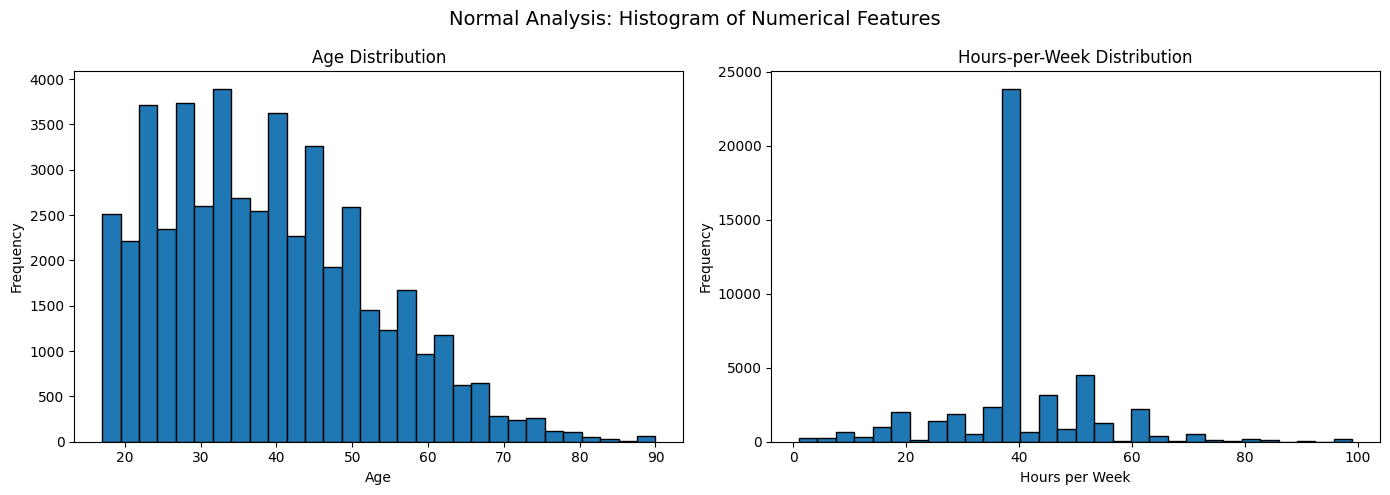

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Normal Analysis: Histogram of Numerical Features", fontsize=14)

axes[0].hist(df['age'], bins=30, edgecolor='black')
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

axes[1].hist(df['hours-per-week'], bins=30, edgecolor='black')
axes[1].set_title("Hours-per-Week Distribution")
axes[1].set_xlabel("Hours per Week")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

- What is the proportion of income classes and gender distribution?
- Is there class imbalance in the target variable?

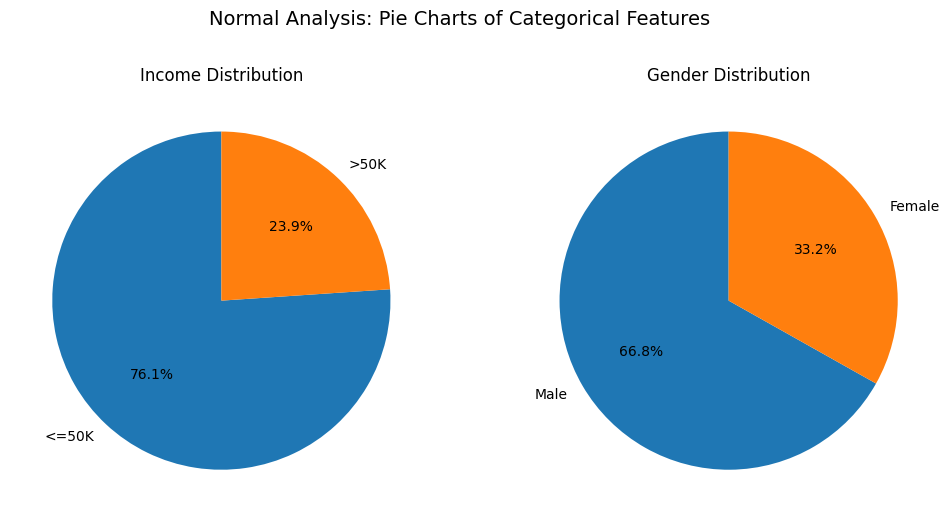

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Normal Analysis: Pie Charts of Categorical Features", fontsize=14)

income_counts = df['income'].value_counts()
axes[0].pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Income Distribution")

gender_counts = df['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Gender Distribution")

plt.show()

- How do age and working hours vary across income groups?
- Do higher income individuals show different distributions?

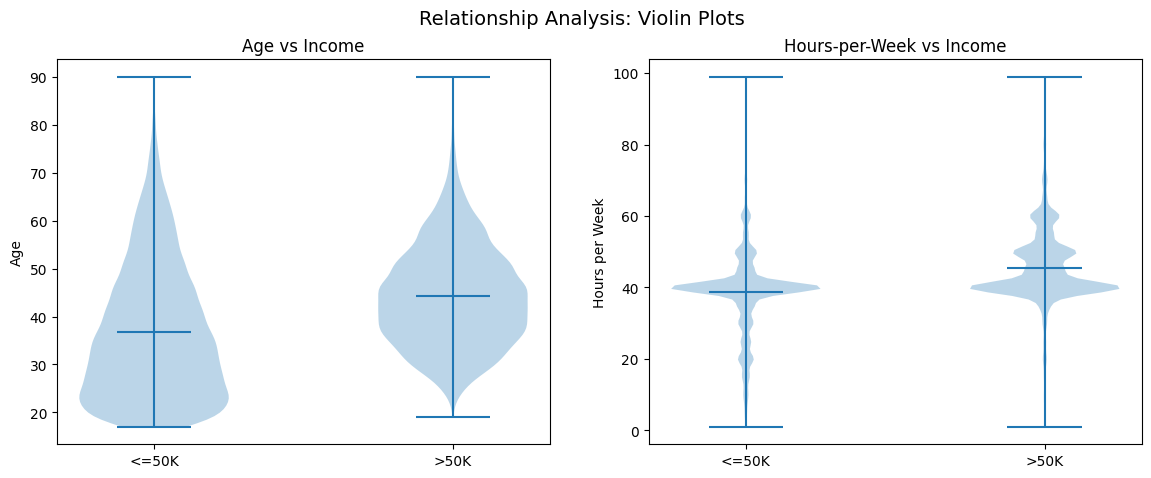

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Relationship Analysis: Violin Plots", fontsize=14)

axes[0].violinplot(
    [df[df['income'] == '<=50K']['age'],
     df[df['income'] == '>50K']['age']],
    showmeans=True
)
axes[0].set_title("Age vs Income")
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['<=50K', '>50K'])
axes[0].set_ylabel("Age")

axes[1].violinplot(
    [df[df['income'] == '<=50K']['hours-per-week'],
     df[df['income'] == '>50K']['hours-per-week']],
    showmeans=True
)
axes[1].set_title("Hours-per-Week vs Income")
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(['<=50K', '>50K'])
axes[1].set_ylabel("Hours per Week")

plt.show()

- Is there a relationship between `age` and `hours-per-week`?
- Do income groups form visible clusters?

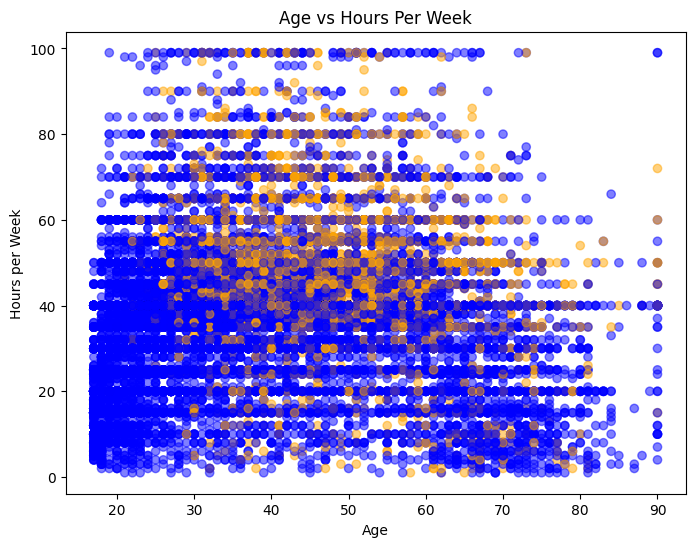

In [16]:
plt.figure(figsize=(8, 6))

colors = df['income'].map({'<=50K': 'blue', '>50K': 'orange'})

plt.scatter(df['age'], df['hours-per-week'], c=colors, alpha=0.5)
plt.title("Age vs Hours Per Week")
plt.xlabel("Age")
plt.ylabel("Hours per Week")

plt.show()

- How are numerical features correlated with each other and income?
- Are there strong correlations or multicollinearity?

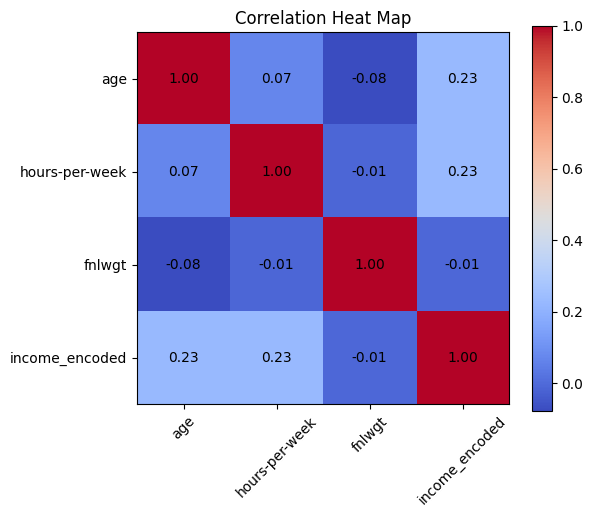

In [17]:
df_corr = df.copy()
df_corr['income_encoded'] = df_corr['income'].map({'<=50K': 0, '>50K': 1})

corr_matrix = df_corr[['age', 'hours-per-week', 'fnlwgt', 'income_encoded']].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(
            j, i,
            f"{corr_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black"
        )

plt.title("Correlation Heat Map")
plt.show()

- Can average working hours be compared across age groups?

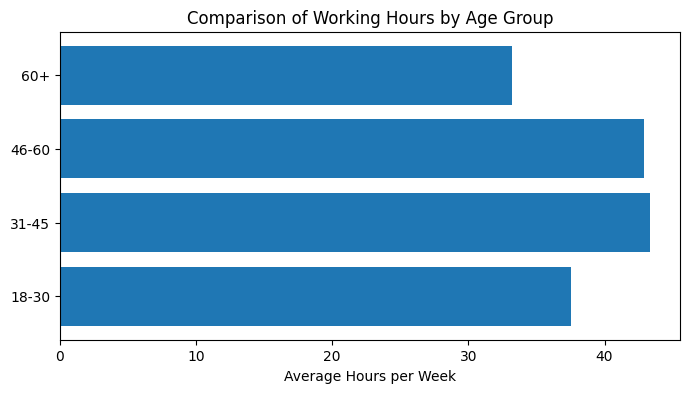

In [18]:
age_groups = ['18-30', '31-45', '46-60', '60+']
avg_hours = [
    df[df['age'].between(18, 30)]['hours-per-week'].mean(),
    df[df['age'].between(31, 45)]['hours-per-week'].mean(),
    df[df['age'].between(46, 60)]['hours-per-week'].mean(),
    df[df['age'] > 60]['hours-per-week'].mean()
]

plt.figure(figsize=(8, 4))
plt.barh(age_groups, avg_hours)
plt.xlabel("Average Hours per Week")
plt.title("Comparison of Working Hours by Age Group")
plt.show()

# **Data Cleaning**

### Replace '?' with NaN

In [19]:
df["workclass"] = df["workclass"].replace("?", np.nan)
df["occupation"] = df["occupation"].replace("?", np.nan)
df["native-country"] = df["native-country"].replace("?", np.nan)
print(df.isin(["?"]).sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### Drop missing values

In [20]:
result = df.dropna().count()
print(result)

age                45222
workclass          45222
fnlwgt             45222
education          45222
educational-num    45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
gender             45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64


#### Remove Duplicates

In [21]:
result = df.drop_duplicates(inplace=True)
print(result)

None


# **Descriptive Statistics**

In [22]:
result = df.describe()
print(result)

                age        fnlwgt  educational-num  capital-gain  \
count  48790.000000  4.879000e+04     48790.000000  48790.000000   
mean      38.652798  1.896690e+05        10.078807   1080.217688   
std       13.708493  1.056172e+05         2.570046   7455.905921   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175550e+05         9.000000      0.000000   
50%       37.000000  1.781385e+05        10.000000      0.000000   
75%       48.000000  2.376062e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48790.000000    48790.000000  
mean      87.595573       40.425886  
std      403.209129       12.392729  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


# **Feature Reduction**

### Drop Irrelevant Columns [education-num, capital-gain and capital-loss]

In [23]:
result = df.drop(["educational-num", "capital-gain", "capital-loss"], axis=1)
print(result)

       age     workclass  fnlwgt     education      marital-status  \
0       25       Private  226802          11th       Never-married   
1       38       Private   89814       HS-grad  Married-civ-spouse   
2       28     Local-gov  336951    Assoc-acdm  Married-civ-spouse   
3       44       Private  160323  Some-college  Married-civ-spouse   
4       18           NaN  103497  Some-college       Never-married   
...    ...           ...     ...           ...                 ...   
48837   27       Private  257302    Assoc-acdm  Married-civ-spouse   
48838   40       Private  154374       HS-grad  Married-civ-spouse   
48839   58       Private  151910       HS-grad             Widowed   
48840   22       Private  201490       HS-grad       Never-married   
48841   52  Self-emp-inc  287927       HS-grad  Married-civ-spouse   

              occupation relationship   race  gender  hours-per-week  \
0      Machine-op-inspct    Own-child  Black    Male              40   
1        Farmin

# **Analytical Queries**

### Population Age Between 18–60

In [24]:
result = df[(df["age"] >=18) & (df["age"] <=60)].shape[0]
print(result)

44591


### Education Level Counts [Bachelors or Master Degree Accomplished]

In [25]:
result1 = df[df["education"] == "Bachelors"].shape[0]
result2 = df[df["education"] == "Masters"].shape[0]
print(f"Bachelors: {result1} Masters: {result2}")

Bachelors: 8013 Masters: 2656


# **Target Variable Encoding**

In [26]:
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

In [27]:
df.duplicated().sum()

0

### Class Distribution

In [28]:
print(pd.Series(df["income"]).value_counts(normalize=True))

income
0    0.760586
1    0.239414
Name: proportion, dtype: float64


## Save DataFrame to CSV

In [30]:
df.to_csv("data/preprosses_data.csv", index=False)